# Sesión 4: Digitalización 2D y Reconocimiento de documentos
## Máster oficial en Humanidades y Patrimonio Digitales
---
Curso 2022-2023


Para esta entrega deberéis redactar un informe de **máximo 4 páginas**, donde tendreis que adjuntar las respuestas a las preguntas cerradas 1 a 3. Después tenéis que explicar los pasos que realizáis en cada apartado de la sección práctica y adjunteis las imagenes de salida de cada paso intermedio asi como su salida del OCR. Debéis justificar las decisiones que toméis.

**No es el objeto de esta practica que obtengáis un resultado perfecto del OCR, pero sí lo es que lidiéis con sus problemas más típicos**. Así pues, si hay algún paso en particular que no conduzca a mejoría o alguna idea de un paso que querríais añadir pero que no sepáis como, explicadlo en forma de texto.

Dispondréis de dos semanas desde el día de la sesión para la entrega.

## Instalar las Dependencias

Para trabajar con Tesseract necesitamos el binario instalado en nuestro sistema
(empleando el gestor de paquetes apt) y un paquete de Python que nos permitirá
usarlo dentro del entorno Jupyter:

* **[tesseract-ocr](https://tesseract-ocr.github.io)**: Instala Tesseract al
sistema linux subyacente.
* **[pytesseract](https://pypi.org/project/pytesseract/)**: Da el acceso al binario de Tesseract desde Python

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

En este punto deberiais reiniciar el entorno para que se apliquen los cambios a la instalación de PIL (una biblioteca necesaria para tratar con imágenes desde Pytesseract). <font color="red"> Tenéis el botón al final de la salida de la celda anterior </font>

In [ ]:
!sudo apt install tesseract-ocr-ell
!sudo apt install tesseract-ocr-tha
!sudo apt install tesseract-ocr-spa

!tesseract --list-langs

Se pueden mirar las opciones de entrada posibles al sistema Tesseract empleando el comando ```--help-extra```. De este modo comprobamos también que la instalación fue exitosa.



In [ ]:
!tesseract --help-extra

Ahora se puede importar la libreria que actúa como puente para Tesseract en un entorno Python.

*   `import pytesseract`

Esto os permitirá hacer llamadas a Tesseract y emplear sus salidas mediante objetos de Python. [Aquí](https://github.com/madmaze/pytesseract) podéis encontrar la documentación pertinente.



In [ ]:
import pytesseract
from pytesseract import Output

print(pytesseract.get_tesseract_version())
print(pytesseract.get_languages())

Además de Tesseract, vamos a usar otras bibliotecas para trabajar con las imagenes de entrada y salida al modelo de OCR.

*   [OpenCV](https://opencv.org/): Proporciona herramientas para manipular imágenes de forma algoritmica, además de la implementación de ciertas técnicas de Visión por Computador.
*   [Matplotlib](https://matplotlib.org/): Una biblioteca para producir visualizaciones en Python

In [ ]:
import cv2
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def transcribe_and_decorate(img):
  d = pytesseract.image_to_data(img, output_type=Output.DICT)

  plt.figure(dpi=300)
  plt.imshow(img, cmap='gray')
  plt.axis('off')

  ax = plt.gca()

  n_boxes = len(d['text'])
  for i in range(n_boxes):
      # Confidence score of the detection
      if int(d['conf'][i]) > 60:
          # Bounding box of the word
          (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])

          # Textual transcription
          transcription = d['text'][i]

          # Draw rectangle
          rect = patches.Rectangle((x, y), w, h, linewidth=1,edgecolor='r', facecolor='none')
          # Add the patch to the Axes
          ax.add_patch(rect)
          # Write the transcription
          plt.annotate(transcription, (x, y), fontsize=2)

  plt.show()
  plt.close()

## Cargar y mostrar una imagen

Para cargar una imagen en forma de variable de Python, se tiene que llamar la función ```cv2.imread(...)``` de OpenCV. Como parametro hay que pasar el nombre del fichero que se quiere cargar.

Adicionalmente, si habéis subido el fichero con las imágenes de entrada sin descomprimir, tenéis que ejecutar este comando Linux para poder acceder a ellas. 

In [ ]:
!unzip M4-sessio4-test_images.zip

In [ ]:
img = cv2.imread('patent.png')

Ahora la variable `img` debería contener la información de color del fichero de entrada. Podemos visualizar la imagen empleando la función `imshow` de la biblioteca `Matplotlib` (importada con el nombre `plt`).

**Importante: Si os sale un error del estilo:**

```
TypeError: Image data of dtype object cannot be converted to float
```
**La llamada a `cv2.imread(...)` no os ha cargado nada. Aseguraos que tenéis las imágenes descomprimidas en la carpeta raíz de la sesión de Colab**

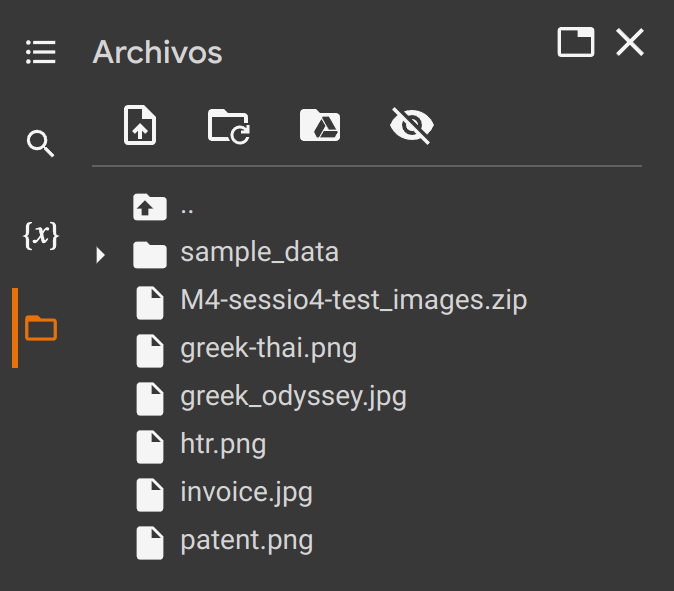

In [ ]:
plt.imshow(img)
plt.axis('off')
plt.show()
plt.close()

## Llamada a Tesseract

Una vez se haya cargado la imagen correctamente, puede llamarse a `pytesseract` para transcribirla. La función más directa que nos otorga la biblioteca Pytesseract es `image_to_string`, que realizará la conversión según los parámetros OEM y PSM que le proveamos.

Los valores posibles del parámetro OEM (OCR Engine Mode) son los siguientes:

0. Motor de OCR de legado.
1. Motor LSTM (Red Neuronal).
2. Combinación Legado + LSTM.
3. Opción por defecto según lo que esté disponible.

Los valores posibles del parámetro PSM (Page Segmentation Mode) son los siguientes:

0. Solo detección de texto y orientación.
1. Segmentación de página automática usando OSD (Orientation and Script Detection).
2. Segmentación de página automática sin usar OSD ni proveer OCR.
3. Segmentación de página automática sin usar OSD.
4. Asumir una unica columna de texto de tamaño variable.
5. Asumir una única columna de texto de anchura uniforme.
6. Asumir un bloque de texto uniforme.
7. Tratar la imagen como una sola línea de texto.
8. Tratar la imagen como una sola palabra.
9. Tratar la imagen como una sola palabra en un círculo.
10. Tratar la imagen como un solo carácter.
11. Texto disperso en la imagen. Encontrar tanto como sea posible sin un orden particular.
12. Texto disperso con OSD.
13. Línea cruda. Tratar la imagen de entrada como una sola línea de texto ignorando hacks específicos de Tesseract.




---

**<font color='red'>
Pregunta 1: Para la imagen ```patent.png```, qué opción de PSM creéis más apropiada? Probad qué ocurre cuando empleáis las opciones 4, 5, 6, 7, 8 o 11.
</font>**

---

**<font color='green'>
Respuesta aquí
</font>**

In [ ]:
custom_config = r'--tessdata-dir "/usr/share/tesseract-ocr/4.00/tessdata" --psm 4' # ESCRIBID AQUÍ LA OPCIÓN
transcription = pytesseract.image_to_string(img, config=custom_config)

print(transcription)

El resultado seguramente sea muy bueno. No obstante, hay un error de transcripción bastante relevante al final del texto (una "a" extra). Esto se debe a que Tesseract espera una entrada perfectamente preprocesada: Requiere que el texto de entrada sea **lo más limpio posible** además de tener el **suficiente margen a su alrededor**.

## Preprocesado de Imagenes

Vamos a añadir un ligero borde a la imagen de prueba antes de pasarla a Tesseract y vamos a ver si el resultado mejora.

In [ ]:
img = cv2.copyMakeBorder(img, 10, 10, 10, 10, cv2.BORDER_CONSTANT, None, [255,255,255])
plt.imshow(img)
plt.axis('off')
plt.show()
plt.close()

custom_config = r'--psm 6' # Recordad añadir vuestra opción predilecta aquí
transcription = pytesseract.image_to_string(img, config=custom_config)

print(transcription)

Bingo! Pero esta imagen de entrada es bastante fácil de tratar, puesto que no tiene ninguna de las dificultades que usualmente encontraríamos en un documento.

## Escritura Manual?

In [ ]:
img = cv2.imread('htr.png')
img = cv2.copyMakeBorder(img, 10, 10, 10, 10, cv2.BORDER_CONSTANT, None, [255,255,255])
plt.imshow(img)
plt.axis('off')
plt.show()
plt.close()

In [ ]:
custom_config = r'--psm 4' 
transcription = pytesseract.image_to_string(img, config=custom_config)

print(transcription)

Los modelos preentrenados de Tesseract no funcionan con texto manuscrito. No obstante, y asumiendo que dispongáis de los datos, en la documentación se detalla como entrenar un modelo personalizado para tal uso.

## Otras características de Tesseract

### Distintos sistemas de escritura y lenguajes

Vamos a ver la lista de lenguajes que nuestra instalación de Tesseract soporta

In [ ]:
!tesseract --list-langs

[Aquí](https://packages.ubuntu.com/search?keywords=tesseract-ocr&searchon=names&suite=groovy&section=all) tenéis una lista de lenguajes disponibles para Tesseract.

In [ ]:
img = cv2.imread('greek_odyssey.jpg')
img = cv2.copyMakeBorder(img, 10, 10, 10, 10, cv2.BORDER_CONSTANT, None, [255,255,255])
plt.imshow(img)
plt.axis('off')
plt.show()
plt.close()

In [ ]:
custom_config = r'--psm 6'
transcription = pytesseract.image_to_string(img, config=custom_config)

print(transcription)

Hay que decirle a Tesseract qué idioma tiene el texto de la imagen de entrada. A tal efecto, añadimos la opción -l y lo sucedimos con el idioma que vamos a emplear (ell hace referencia al griego).

In [ ]:
custom_config = r'--psm 6 -l ell'
transcription = pytesseract.image_to_string(img, config=custom_config)

print(transcription)

### Podemos combinar varios sistemas de escritura?

Por supuesto! Solo hay que listar los idiomas de entrada separados por signos de suma + en el comando de entrada

In [ ]:
img = cv2.imread('greek-thai.png')
img = cv2.copyMakeBorder(img, 10, 10, 10, 10, cv2.BORDER_CONSTANT, None, [255,255,255])
plt.imshow(img)
plt.axis('off')
plt.show()
plt.close()

In [ ]:
custom_config = r'--psm 6 -l tha+ell+eng'
transcription = pytesseract.image_to_string(img, config=custom_config)

print(transcription)

**<font color='red'>
Pregunta 2: El tiempo de ejecucion de esta celda ha sido comparativamente mas largo que los anteriores (observad el checkbox a la izquierda de la celda del código con el tiempo de ejecución). Investigad a qué se debe este aumento al introducir los nuevos lenguajes. 
</font>**

<font color='green'> RESPUESTA AQUÍ </font>

### Layout analysis y OCR

Podéis hacer que Tesseract ejecute la detección de los elementos de la imagen de entrada por vosotros. No obstante, la salida del modelo será más complicada que un mero texto, puesto que ahora dispondréis de las bounding boxes de cada detección de texto además de la transcripción.

In [ ]:
img = cv2.imread('invoice.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()
plt.close()

In [ ]:
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

Como podéis ver, como output tenemos un diccionario python con varias claves. 

**<font color='red'>
Pregunta 3: Averiguad el significado de cada clave. Podéis emplear la salida de la celda anterior (acceded a los campos correspondientes con `d[CAMPO]`
</font>**

<font color='green'> INSERTAD LA RESPUESTA EN LOS PUNTOS DE ABAJO </font>
- `level`: 
- `page_num`:
- `block_num`:
- `par_num`:
- `line_num`:
- `word_num`:
- `left`:
- `top`:
- `width`:
- `height`:
- `conf`:
- `text`:


In [ ]:
transcribe_and_decorate(img)

# Os toca a vosotros

**<font color="red">
Tenéis que tratar de hacer OCR en un documento con varias fuentes de ruido de entrada. Tenéis que implementar varios pasos para limpiar la imagen. Cada vez que implementéis uno, deberéis analizar como mejora la salida del modelo de OCR
</font>**

Os recomiendo encarecidamente que consultéis materiales como [los tips & tricks de Tesseract para mejorar la salida](https://tesseract-ocr.github.io/tessdoc/ImproveQuality.html) para disponer de ejemplos acerca de cómo codificar cada paso. No obstante, os proveo de la estructura ya realizada, de modo que solo tenéis que modificar las celdas aquí listadas.

---

No olvideis ejecutar estas funciones de ayuda!

## Cargar la Imagen

Primero vamos a cargar la imagen que vamos a emplear en esta parte de la práctica

In [ ]:
img = cv2.imread('times.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(dpi=300)
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
transcribe_and_decorate(img)

## Binarización

Basaos en la información de la [documentación](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html) de OpenCV. Os recomiendo que miréis los métodos de Thresholding adaptable para mejores resultados.

In [ ]:
# img_threshold = cv2.threshold(img, ...) # COMPLETAD ESTE CODIGO
img_threshold = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]

plt.figure(dpi=300)
plt.axis('off')
plt.imshow(img_threshold, cmap='gray')
plt.show()

In [ ]:
transcribe_and_decorate(img_threshold)

Comparad el resultado con el del modelo [DocEnTr](https://replicate.com/cjwbw/docentr).  **Tarda un rato en procesar, asi que tened paciencia**

<font color="green"> Añadid en la celda de código a continuación la imagen resultante del DocEnTr y razonad la respuesta </font>

In [ ]:
img_docentr = cv2.imread('times_docentr.png')  # Si cargáis el fichero con este nombre, ya lo tenéis
img_docentr = cv2.cvtColor(img_docentr, cv2.COLOR_BGR2GRAY)

transcribe_and_decorate(img_docentr)

## De-Noising

Basaos en la información de la [documentación](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html) de OpenCV. Os recomiendo que empleéis filtrado no lineal usando morfología matemática. En especial, tratad de usar un filtro de opening o de mediana para quitar los puntos del ruido salt and pepper.

In [ ]:
strel = np.ones((3, 3))             # Kernel de morfologia (cuadrado 3x3, podeis cambiarlo)
morph_operation = cv2.MORPH_ERODE   # Tipo de operación morfologica a usar

img_denoised =  cv2.morphologyEx(img_threshold, morph_operation, strel)

# Podeis insertar más pasos si lo estimais conveniente
# img_denoised =  cv2.morphologyEx(img_threshold, morph_operation, strel)

# Existen otros filtros que podéis probar

plt.figure(dpi=300)
plt.axis('off')
plt.imshow(img_denoised, cmap='gray')
plt.show()

In [ ]:
transcribe_and_decorate(img_denoised)

## Márgenes

Añadid un poco de margen alrededor de la imagen

In [ ]:
img_border = cv2.copyMakeBorder(img_denoised, 64, 64, 64, 64, cv2.BORDER_CONSTANT, None, [255,255,255])

plt.figure(dpi=300)
plt.axis('off')
plt.imshow(img_border, cmap='gray')
plt.show()

In [ ]:
transcribe_and_decorate(img_denoised)

**Ahora podéis rellenar el informe de la práctica**